## Titanic Survival Prediction Model

### Reading and understanding the data

In [1]:
df.train <- read.csv('titanic_train.csv')
head(df.train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [3]:
df.train$Sex <- as.factor(df.train$Sex)
df.train$Ticket <- as.factor(df.train$Ticket)
df.train$Cabin <- as.factor(df.train$Cabin)

In [4]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### Exploratory Data Analysis

In [5]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



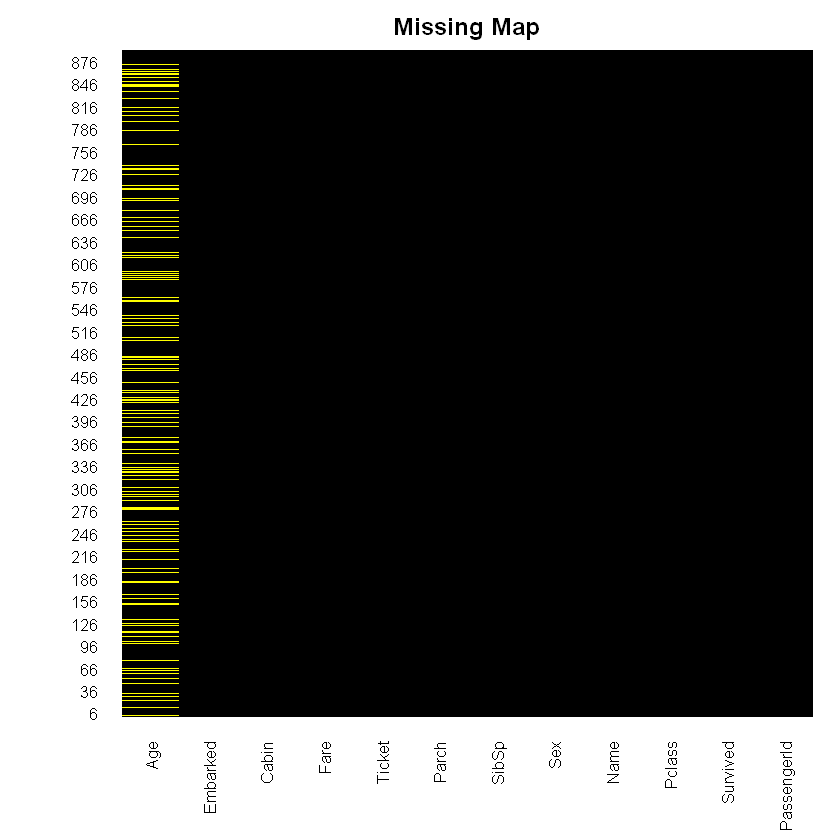

In [6]:
missmap(df.train, main='Missing Map', col = c('yellow','black'), legend =F)

In [7]:
library(ggplot2)

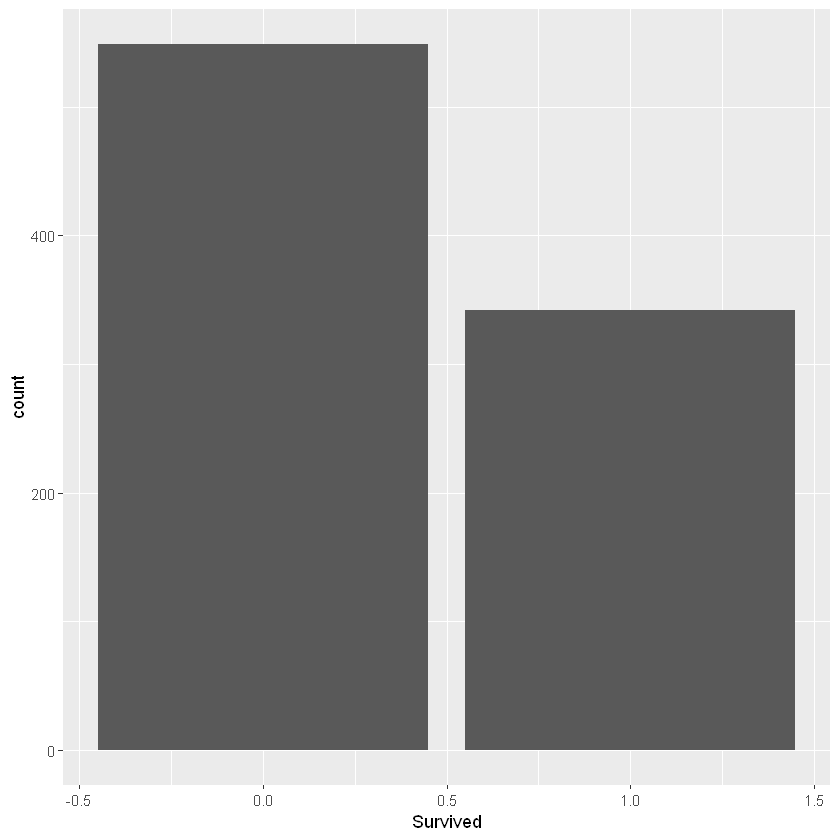

In [8]:
ggplot(df.train, aes(Survived)) + geom_bar()

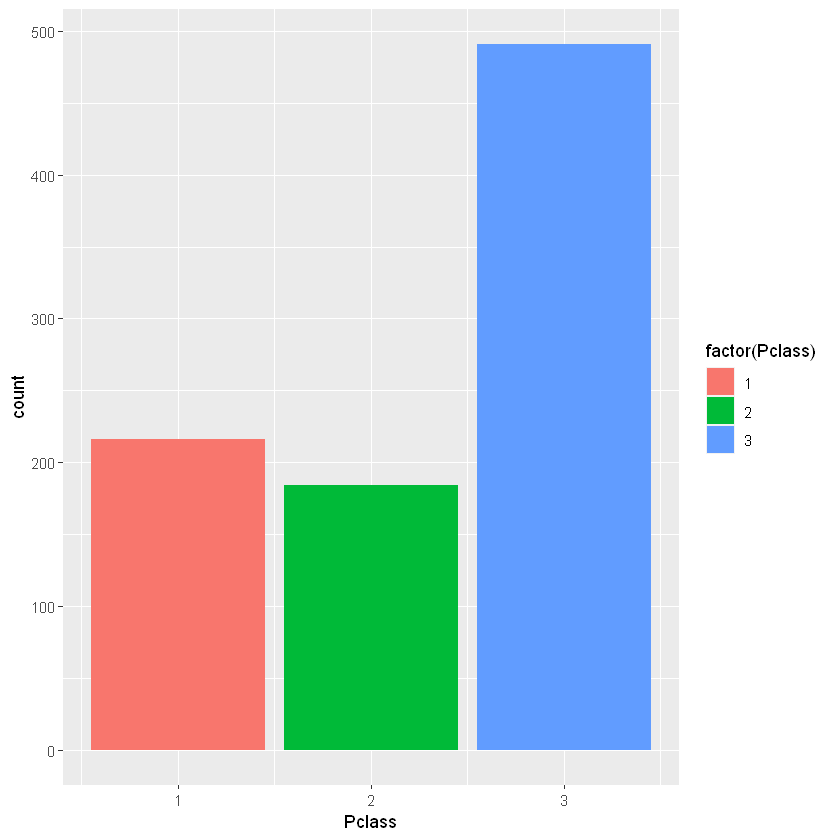

In [9]:
ggplot(df.train, aes(Pclass)) + geom_bar(aes(fill = factor(Pclass)))

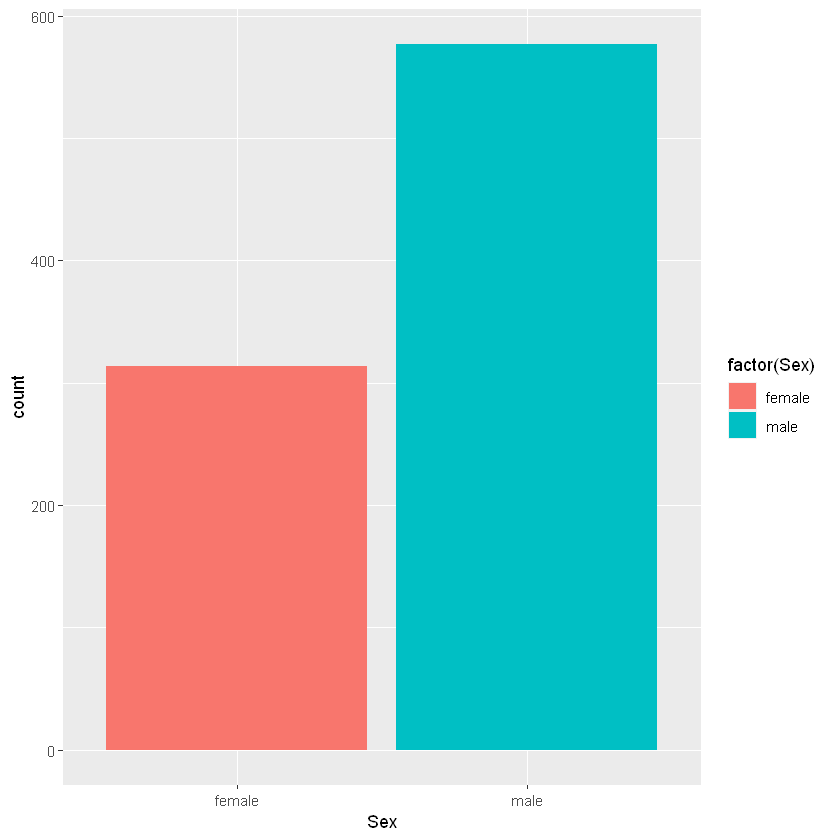

In [10]:
ggplot(df.train, aes(Sex)) + geom_bar(aes(fill = factor(Sex)))

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."


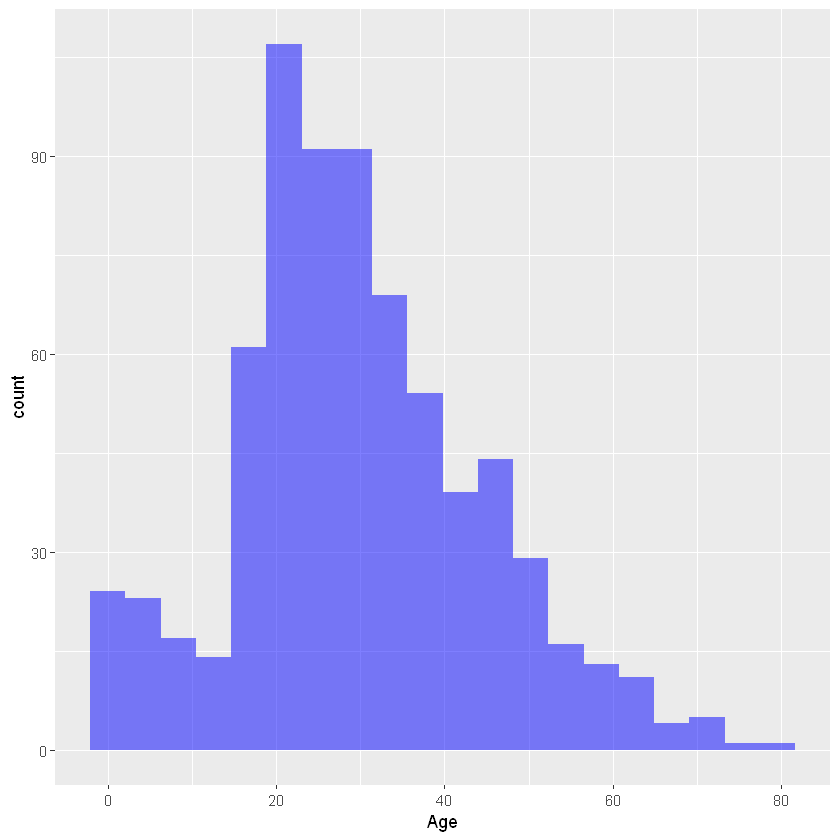

In [11]:
ggplot(df.train, aes(Age)) + geom_histogram(bins=20, alpha=0.5, fill='blue')

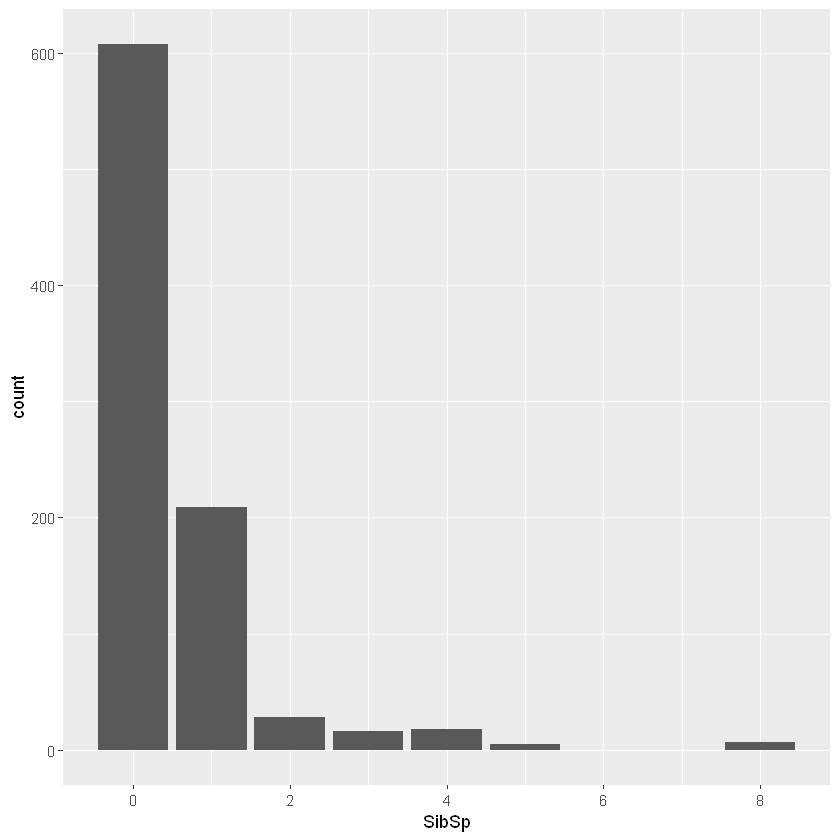

In [12]:
ggplot(df.train, aes(SibSp)) + geom_bar()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



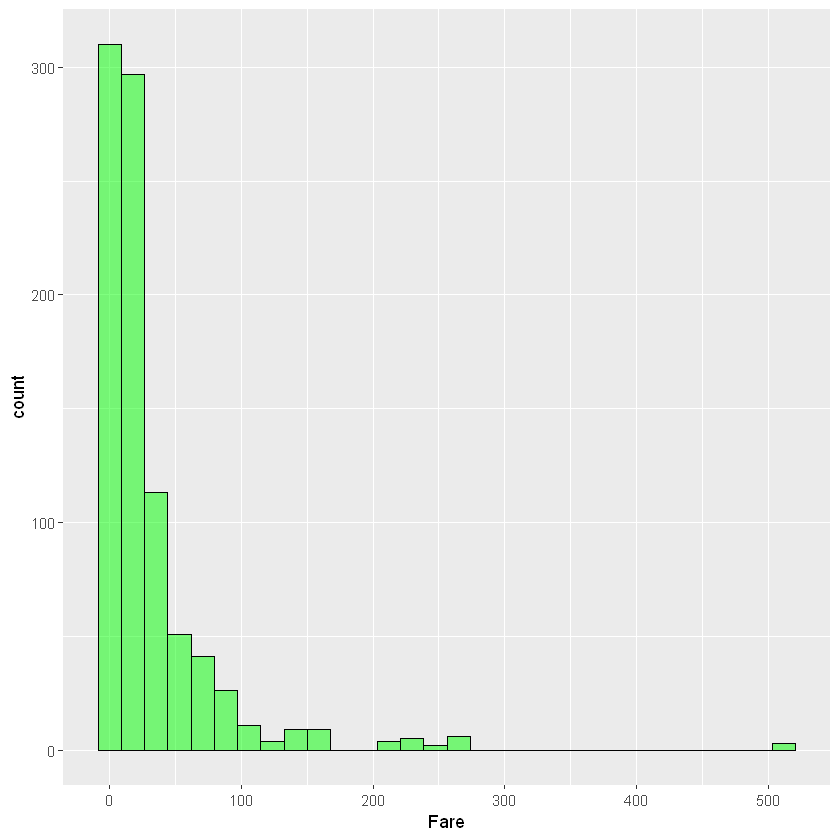

In [13]:
ggplot(df.train, aes(Fare)) + geom_histogram(fill='green', color='black', alpha=0.5)

### Dealing with missing data

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."


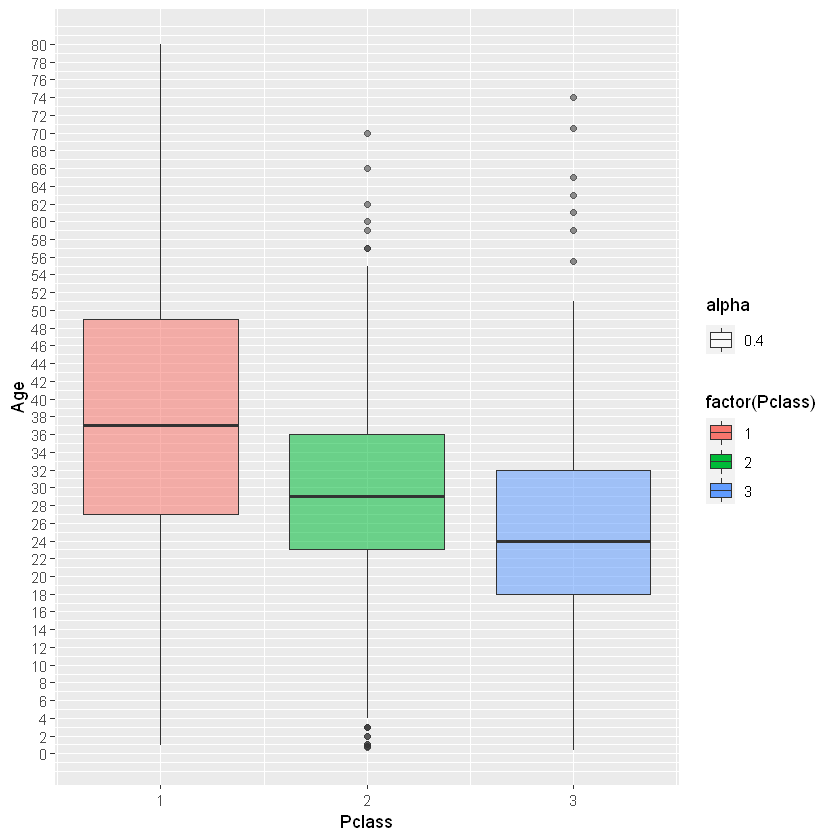

In [14]:
pl1 <- ggplot(df.train, aes(Pclass, Age))
pl2 <- pl1 + geom_boxplot(aes(group=Pclass, fill=factor(Pclass), alpha=0.4))
pl3 <- pl2 + scale_y_continuous(breaks = seq(min(0),max(80), by =2))
pl3

### Imputing Age based on Pclass and Sex

In [15]:
impute_age <- function(age, class, sex){
    out <- age
    for (i in 1:length(age)){
        if (is.na(age[i])){
            if(sex[i] == 1){
               if(class[i] == 1){
                    out[i] <- 35
               }else if(class[i] == 2){
                   out[i] <- 28
               }else{
                   out[i] <- 21.5
               }
            } else{
                if(class[i] == 1){
                    out[i] <- 40
               }else if(class[i] == 2){
                   out[i] <- 30
               }else{
                   out[i] <- 25
            }
        }
    }else{
            out[i] <- age[i]
        }
}
    return(out)
}

fixed.ages <- impute_age(df.train$Age, df.train$Pclass, df.train$Sex)

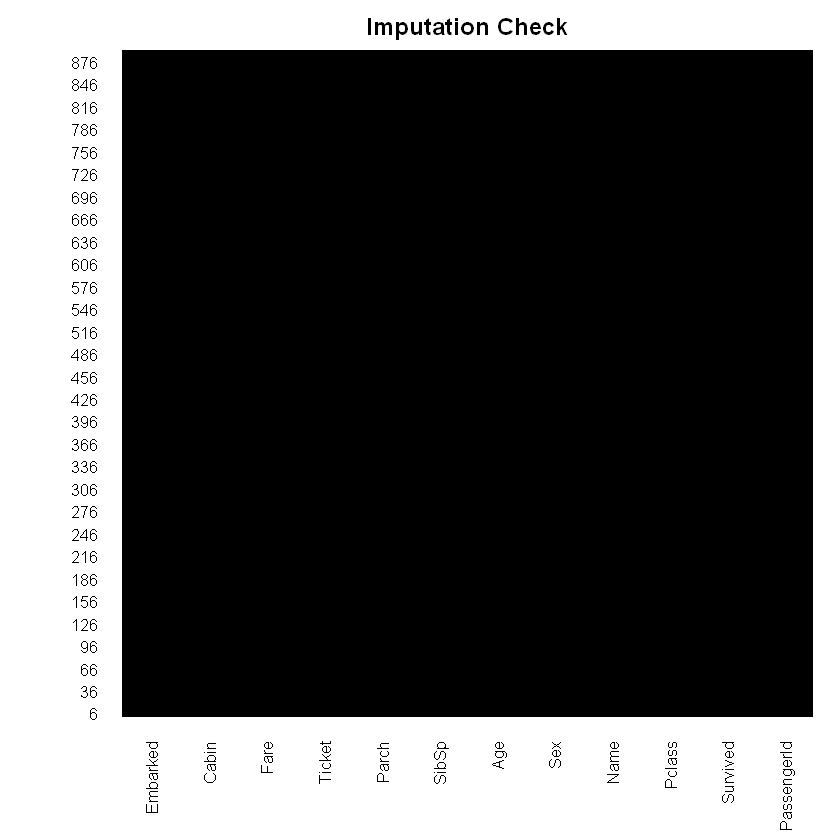

In [16]:
df.train$Age <- fixed.ages

missmap(df.train, main = 'Imputation Check', col =c('yellow','black'), legend=F)

In [17]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 25 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [18]:
library(dplyr)
df.train <- select(df.train, -PassengerId,-Name,-Ticket,-Cabin)
head(df.train)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,25,0,0,8.4583,Q


In [19]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 25 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


In [20]:
df.train$Survived <- as.factor(df.train$Survived)
df.train$Pclass <- as.factor(df.train$Pclass)
df.train$SibSp <- as.factor(df.train$SibSp)

In [21]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 25 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


### 1st Model - Logistic Regression

In [22]:
log.model <- glm(Survived ~., family=binomial(link='logit'), data = df.train)

In [23]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8397  -0.5949  -0.4136   0.6012   2.5192  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.871e+01  1.650e+03   0.011 0.990956    
Pclass2     -1.095e+00  3.087e-01  -3.548 0.000388 ***
Pclass3     -2.283e+00  3.143e-01  -7.262 3.81e-13 ***
Sexmale     -2.695e+00  2.041e-01 -13.205  < 2e-16 ***
Age         -4.465e-02  8.443e-03  -5.288 1.24e-07 ***
SibSp1       1.522e-01  2.175e-01   0.700 0.484210    
SibSp2      -1.854e-01  5.210e-01  -0.356 0.721912    
SibSp3      -2.030e+00  7.170e-01  -2.831 0.004641 ** 
SibSp4      -1.483e+00  7.519e-01  -1.973 0.048534 *  
SibSp5      -1.578e+01  9.594e+02  -0.016 0.986874    
SibSp8      -1.582e+01  7.565e+02  -0.021 0.983318    
Parch       -1.077e-01  1.188e-01  -0.907 0.364502    
Fare         2.159e-03  2.420e-03   0.892 0.372322    
EmbarkedC

#### Validating the model

In [24]:
library(caTools)

In [25]:
set.seed(101)
split <- sample.split(df.train$Survived, SplitRatio=0.7)
final.train <- subset(df.train, split == T)
final.test <- subset(df.train, split == F)

In [26]:
final.log.model <- glm(Survived ~.,family=binomial(link='logit'), data=final.train)

In [27]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8900  -0.5749  -0.4129   0.6554   2.5044  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.795e+01  2.400e+03   0.007  0.99403    
Pclass2     -1.198e+00  3.744e-01  -3.199  0.00138 ** 
Pclass3     -2.205e+00  3.756e-01  -5.869 4.38e-09 ***
Sexmale     -2.689e+00  2.443e-01 -11.008  < 2e-16 ***
Age         -4.206e-02  9.896e-03  -4.251 2.13e-05 ***
SibSp1       9.509e-02  2.647e-01   0.359  0.71940    
SibSp2      -2.066e-01  6.187e-01  -0.334  0.73846    
SibSp3      -2.071e+00  9.067e-01  -2.285  0.02234 *  
SibSp4      -1.026e+00  8.497e-01  -1.207  0.22734    
SibSp5      -1.605e+01  9.582e+02  -0.017  0.98664    
SibSp8      -1.625e+01  9.989e+02  -0.016  0.98702    
Parch        3.799e-02  1.456e-01   0.261  0.79418    
Fare         2.641e-03  2.796e-03   0.945  0.34490    
Embark

In [28]:
fitted.probabilities <- predict(final.log.model, final.test, type='response')
fitted.results <- ifelse(fitted.probabilities>=0.5,1,0)

In [29]:
misClassError <- mean(fitted.results != final.test$Survived)
print(1-misClassError)

[1] 0.7910448


#### Confusion Matrix

In [30]:
table(final.test$Survived, fitted.probabilities>=0.5)

   
    FALSE TRUE
  0   140   25
  1    31   72

### 2nd Model - Random Forest

In [31]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [32]:
rf.model <- randomForest(Survived ~., data = final.train)

In [33]:
rf.predictions <- predict(rf.model, final.test)

In [34]:
rf.misClassError <- mean(rf.predictions != final.test$Survived)
print(1-rf.misClassError)

[1] 0.8320896


In [35]:
table(final.test$Survived, rf.predictions)

   rf.predictions
      0   1
  0 150  15
  1  30  73

#### RF Model

In [36]:
randfor.model <- randomForest(Survived ~., data = df.train)

### Preparing the Test data

In [37]:
df.test <- read.csv('titanic_test.csv')
df.test2 <- df.test

In [38]:
head(df.test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [39]:
str(df.test)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...


In [40]:
df.test$Sex <- as.factor(df.test$Sex)
df.test$Ticket <- as.factor(df.test$Ticket)
df.test$Cabin <- as.factor(df.test$Cabin)
df.test$Pclass <- as.factor(df.test$Pclass)
df.test$SibSp <- as.factor(df.test$SibSp)

In [41]:
str(df.test)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : Factor w/ 7 levels "0","1","2","3",..: 1 2 1 1 2 1 1 2 1 3 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...


In [42]:
PID <- df.test$PassengerID

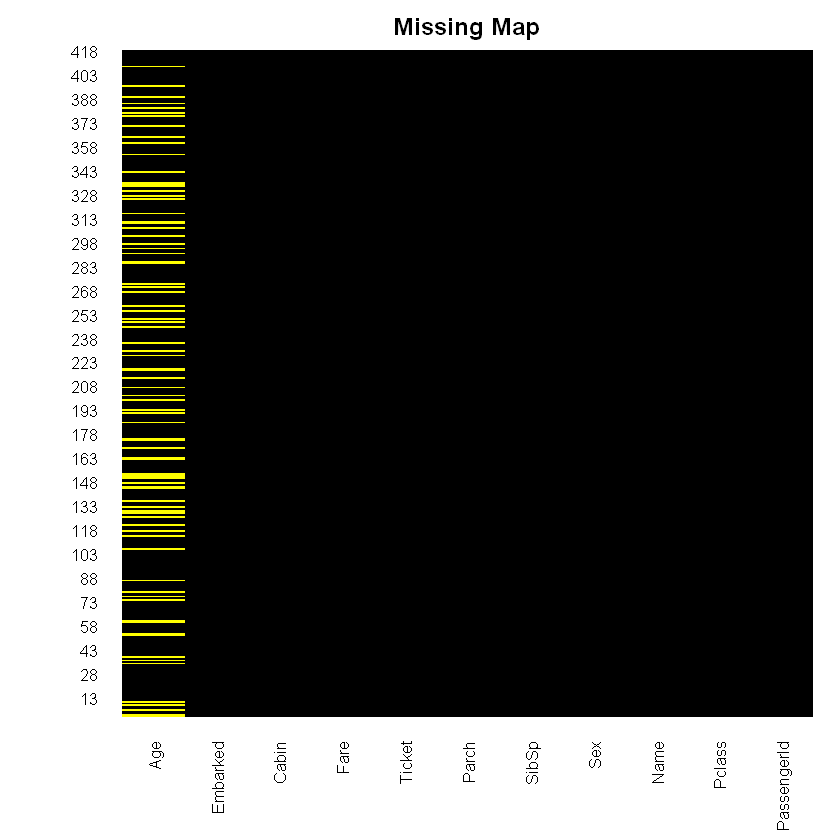

In [43]:
missmap(df.test, main='Missing Map', col = c('yellow','black'), legend =F)

In [44]:
fixed.test_ages <- impute_age(df.test$Age, df.test$Pclass, df.test$Sex)

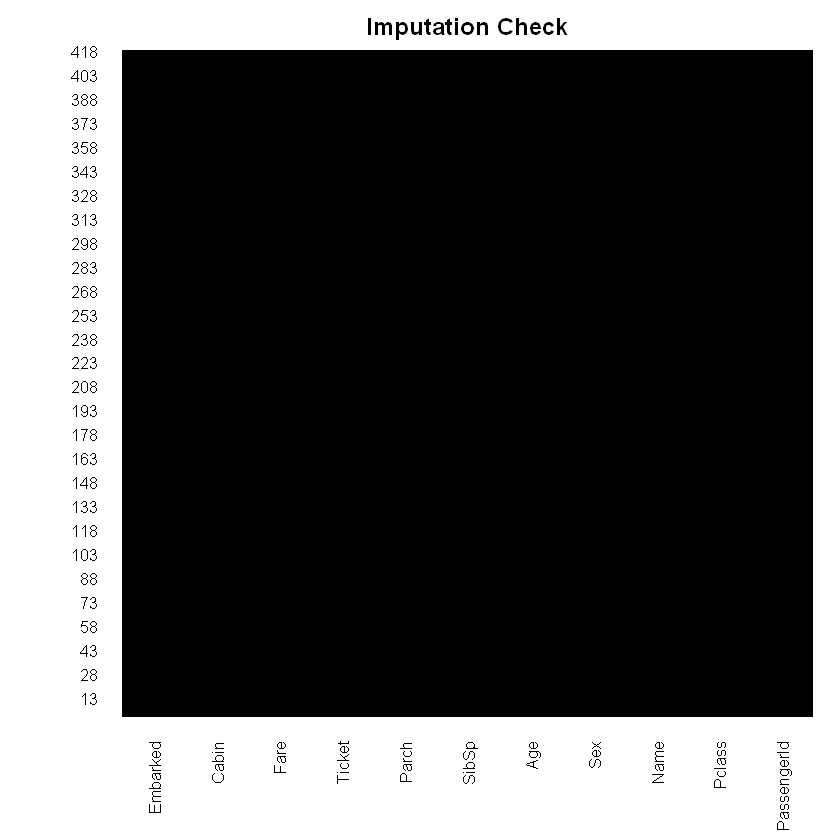

In [45]:
df.test$Age <- fixed.test_ages

missmap(df.test, main = 'Imputation Check', col =c('yellow','black'), legend=F)

In [46]:
df.test <- select(df.test, -PassengerId,-Name,-Ticket,-Cabin)

In [47]:
rf.pred <- predict(randfor.model, df.test)

In [48]:
lr.pred_fit <- predict(log.model, df.test)
lr.pred <- ifelse(lr.pred_fit>=0.5,1,0)

In [49]:
str(rf.pred)

 Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 1 2 1 ...
 - attr(*, "names")= chr [1:418] "1" "2" "3" "4" ...


In [50]:
str(lr.pred)

 Named num [1:418] 0 0 0 0 1 0 1 0 1 0 ...
 - attr(*, "names")= chr [1:418] "1" "2" "3" "4" ...


In [51]:
output.lr <- data.frame(PassengerID = df.test2$PassengerId, Survived = lr.pred)
output.rf <- data.frame(PassengerID = df.test2$PassengerId, Survived = rf.pred)

In [52]:
head(output.lr)

,PassengerID,Survived
,<int>,<dbl>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,1
6,897,0


In [53]:
head(output.rf)

,PassengerID,Survived
,<int>,<fct>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,1
6,897,0


In [55]:
write.csv(output.lr, 'Titanic_LR.csv', row.names=F)
write.csv(output.rf, 'Titanic_RF.csv', row.names=F)

## END!!!